# **Willkommen zur interaktiven Vorlesung**

**Sebastian Gnann**


Bei Fragen und Feedback wenden Sie sich bitte an: sebastian.gnann@hydrologie.uni-freiburg.de

---

Die Online-Vorlesung basiert auf einem sogenannten Jupyter Notebook (https://jupyter.org/). 
Ein Notebook besteht aus einzelnen Zellen, die entweder Markdown-Text oder Python-Code beinhalten.

TODO: Lernziele und Dokumentation...

Lade notwendige Packages.

In [1]:
# import all necessary Python packages
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
import pandas as pd
import ipywidgets as widgets

Wir laden zuerst die Messdaten.

In [2]:
C = pd.read_csv("Messdaten_Konzentration.csv", sep=',')
C.head()

,Zeit [s],Konzentration [mug/l]
0,500,0.000000
1,550,0.000000
2,660,2.043166
3,690,5.468405
4,720,7.790109


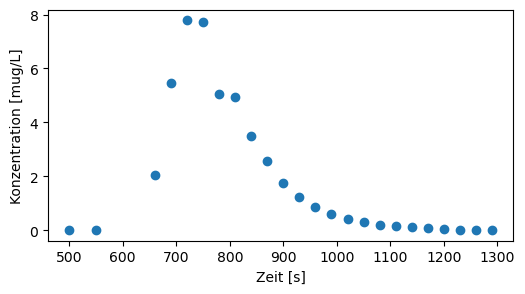

In [3]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(C["Zeit [s]"], C["Konzentration [mug/l]"], 'o', c='tab:blue')
plt.xlabel('Zeit [s]')
plt.ylabel('Konzentration [mug/L]')
%matplotlib inline

## Gleichung
Die Lösung der 1-dimensionalen Advektions-Dispersions-Gleichung ist:
$$ C(x,t) = {M \over Q} {x \over \sqrt{4 \pi D_L t^3}} \exp{\left[ - (x-v t)^2 \over 4 D_L t \right]} $$


In [4]:
def one_d_transport_equation(t, x, M, Q, D_L, v):
    C = M/Q * (x/np.sqrt(4*np.pi*D_L*t**3)) * np.exp(-(x-v*t)**2/(4*D_L*t))
    return C

In [17]:
def f(D_L, v):
    
    # fixed parameters
    Q = 617 # [l/s]
    M = 1000000 # [µg]
    x = 450 # [m]

    C_calc = one_d_transport_equation(C["Zeit [s]"], x, M, Q, D_L, v)
    
    fig, ax = plt.subplots(figsize=(6, 3))
    ax.plot(C["Zeit [s]"], C["Konzentration [mug/l]"], 'o', c='tab:blue', label='Gemessen')
    ax.plot(C["Zeit [s]"], C_calc, '-', c='tab:orange', label='Berechnet')
    ax.set_xlim([0, 1500])
    plt.xlabel('Zeit [s]')
    plt.ylabel('Konzentration [mug/L]')
    plt.legend()

widgets.interact(f, D_L=(0.1,5.0), v=(0.1,2.0))

%matplotlib inline

interactive(children=(FloatSlider(value=2.5500000000000003, description='D_L', max=5.0, min=0.1), FloatSlider(…

## Automatische Optimisierung
Das manuelle Anpassen der Kurve ist in diesem Fall recht einfach, wird bei komplizierteren Problemen aber schnell sehr zeitaufwändig.
Wie könnte man automatisch geeignete Parameter finden? 

In [6]:
# calculate RMSE
# minimise RMSE

## Beispiellösungen der Advektions-Dispersions-Gleichung
Im folgenden wird die Advektions-Dispersions-Gleichung für verschiedene Parameterwerte gelöst. Man kann sich die Lösung entweder im Raum oder in der Zeit betrachten, um das Ausbreiten eines Stoffes zu veranschaulichen.

Fragen: Was passiert, wenn der Dispersionskoeffizient erhöht wird mit der Durchbruchskurve? Und was wenn die mittlere Geschwindigkeit verringert wird?


In [16]:
def f(D_L,v):
    
    # fixed parameters
    Q = 617 # [l/s]
    M = 1000000 # [µg]
    x = 450 # [m]
    
    # plot results
    fig, axes = plt.subplots(figsize=(12, 3), constrained_layout=True, 
                             nrows=1, ncols=2, gridspec_kw={'width_ratios': [2, 2]})
    
    # solve transport equation in space for a few times
    x = np.linspace(0, 500, 1001)
    C0 = one_d_transport_equation(1, x, M, Q, D_L, v)
    C1 = one_d_transport_equation(20, x, M, Q, D_L, v)
    C2 = one_d_transport_equation(50, x, M, Q, D_L, v)
    C3 = one_d_transport_equation(100, x, M, Q, D_L, v)
    
    #axes[0].step(x, C0, '-', c='grey', label='t0')
    axes[0].plot(x, C1, '-', c='tab:blue', label='t=20')
    axes[0].plot(x, C2, '-', c='tab:orange', label='t=50')
    axes[0].plot(x, C3, '-', c='tab:green', label='t=100')
    #axes[0].set_xlim([0, 1000])
    #axes[0].set_ylim([0, 250])
    axes[0].set_xlabel('Abstand [m]')
    axes[0].set_ylabel('Konzentration [mug/L]')
    axes[0].legend()

    # solve transport equation in time for a few locations
    t = np.linspace(1, 251, 1001)
    C0 = one_d_transport_equation(t, 1, M, Q, D_L, v)
    C1 = one_d_transport_equation(t, 20, M, Q, D_L, v)
    C2 = one_d_transport_equation(t, 50, M, Q, D_L, v)
    C3 = one_d_transport_equation(t, 100, M, Q, D_L, v)
    
    #ax.step(x, C0, '-', c='grey', label='x0')
    axes[1].plot(t, C1, '-', c='tab:blue', label='x=20')
    axes[1].plot(t, C2, '-', c='tab:orange', label='x=50')
    axes[1].plot(t, C3, '-', c='tab:green', label='x=100')
    #axes[1].set_xlim([0, 1000])
    #axes[1].set_ylim([0, 250])
    axes[1].set_xlabel('Zeit [s]')
    axes[1].set_ylabel('Konzentration [mug/L]')
    axes[1].legend()

widgets.interact(f, D_L=(0.01,39.99), v=(0.01,3.99))

%matplotlib inline

interactive(children=(FloatSlider(value=20.000000000000004, description='D_L', max=39.99, min=0.01), FloatSlid…

In [9]:
# show base case and change in both space and time 
def f(D_L,v):
    
    # fixed parameters
    Q = 617 # [l/s]
    M = 1000000 # [µg]
    x = 450 # [m]

    # variable parameters
    D_L_default = 20.01 #1.5 # [m²/s]
    v_default = 2.01 # [m/s]	

    # time and space variables
    x = np.linspace(0, 250, 1001)
    x_fix = 50
    t = np.linspace(1, 126, 1001)
    t_fix = 50

    # solve transport equation
    C_t_default = one_d_transport_equation(t_fix, x, M, Q, D_L_default, v_default)
    C_t_variable = one_d_transport_equation(t_fix, x, M, Q, D_L, v)
    C_x_default = one_d_transport_equation(t, x_fix, M, Q, D_L_default, v_default)
    C_x_variable = one_d_transport_equation(t, x_fix, M, Q, D_L, v)

    # plot results
    fig, axes = plt.subplots(figsize=(12, 3), constrained_layout=True, 
                             nrows=1, ncols=2, gridspec_kw={'width_ratios': [2, 2]})
    
    axes[0].axvline(x = x_fix, color = 'lightgrey')
    axes[0].plot(x, C_t_default, '-', c='grey', label='D_L = 20.01; v = 2.01')
    axes[0].plot(x, C_t_variable, '-', c='tab:blue', label='D_L = ' + str(D_L) + '; v = ' + str(v))
    axes[0].set_title('Zeit = ' + str(t_fix) + 's')
    axes[0].set_xlabel('Abstand [m]')
    axes[0].set_ylabel('Konzentration [mug/L]')
    axes[0].legend()

    axes[1].axvline(x = t_fix, color = 'lightgrey')  
    axes[1].plot(t, C_x_default, '-', c='grey', label='D_L = 20.01; v = 2.01')
    axes[1].plot(t, C_x_variable, '-', c='tab:blue', label='D_L = ' + str(D_L) + '; v = ' + str(v))
    axes[1].set_title('Abstand = ' + str(x_fix) + 'm')
    axes[1].set_xlabel('Zeit [s]')
    axes[1].set_ylabel('Konzentration [mug/L]')
    axes[1].legend()

widgets.interact(f, D_L=(0.01,39.99), v=(0.01,3.99))

%matplotlib inline

interactive(children=(FloatSlider(value=20.000000000000004, description='D_L', max=39.99, min=0.01), FloatSlid…